In [1]:
import pandas as pd
import numpy as np
import ipaddress
import category_encoders as ce
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DNN-EdgeIIoT-dataset.csv")

/var/folders/_3/zbd4dqld5rjby9s9vfccxmm00000gn/T/ipykernel_55571/3820387047.py:1: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DNN-EdgeIIoT-dataset.csv")


In [3]:
print(len(df["Attack_type"].unique()))
print(df["Attack_type"].value_counts().index.to_list())

15
['Normal', 'DDoS_UDP', 'DDoS_ICMP', 'SQL_injection', 'Password', 'Vulnerability_scanner', 'DDoS_TCP', 'DDoS_HTTP', 'Uploading', 'Backdoor', 'Port_Scanning', 'XSS', 'Ransomware', 'MITM', 'Fingerprinting']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [5]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2021 23:24:32.816050000,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,2021 23:24:32.816595000,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,2021 23:24:32.818043000,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,2021 23:24:32.820831000,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [6]:
noisy = ['frame.time', 'Attack_label']
df1 = df.copy()
df1 = df1.drop(noisy, axis=1)

Encoder Attack Label

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Attack_labels'] = encoder.fit_transform(df1['Attack_type'])
attack_labels = encoder.classes_
df1 = df1.drop("Attack_type", axis=1)
df2 = df1.copy()

In [8]:
df2

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_labels
0,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7
1,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,7
2,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7
3,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7
4,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2219197,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2219198,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2219199,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [9]:
print(attack_labels)

['Backdoor' 'DDoS_HTTP' 'DDoS_ICMP' 'DDoS_TCP' 'DDoS_UDP' 'Fingerprinting'
 'MITM' 'Normal' 'Password' 'Port_Scanning' 'Ransomware' 'SQL_injection'
 'Uploading' 'Vulnerability_scanner' 'XSS']


Encoder IP

In [10]:
def ip_to_int(ip):
    try:
        ip_obj = ipaddress.ip_address(ip)
        if isinstance(ip_obj, ipaddress.IPv4Address):
            return int(ip_obj)
        else:
            return int(ip_obj._ip)
    except ValueError:
        # Bỏ qua các giá trị không phải địa chỉ IP hợp lệ
        return ip
    
df2['ip.src_host'] = df2['ip.src_host'].apply(ip_to_int)
df2['ip.dst_host'] = df2['ip.dst_host'].apply(ip_to_int)


In [11]:
df2['ip.src_host'] = df2['ip.src_host'].astype("float64")
df2['ip.dst_host'] = df2['ip.dst_host'].astype("float64")

In [12]:
df2

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_labels
0,3.232236e+09,3.232236e+09,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7
1,3.232236e+09,3.232236e+09,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,7
2,3.232236e+09,3.232236e+09,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7
3,3.232236e+09,3.232236e+09,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7
4,3.232236e+09,3.232236e+09,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2.789975e+09,3.232236e+09,0,0.0,0.0,0,31814.0,45620.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2219197,1.185031e+09,3.232236e+09,0,0.0,0.0,0,27718.0,45636.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2219198,6.719652e+08,3.232236e+09,0,0.0,0.0,0,18502.0,45672.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2219199,3.106600e+08,3.232236e+09,0,0.0,0.0,0,1862.0,45737.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Chia thành 2 tập x, y để xử lý dữ liêu

In [13]:
x = df2.drop(['Attack_labels'], axis= 1)
y = df2['Attack_labels']

In [14]:
x1 = x.columns

In [15]:
object_columns = x.select_dtypes("object").columns.to_list()
print(len(object_columns))
print(object_columns)

16
['arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'tcp.options', 'tcp.payload', 'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic']


In [16]:
number_columns = df2.drop(object_columns, axis= 1).columns.to_list()
print(len(number_columns))
print(number_columns)

45
['ip.src_host', 'ip.dst_host', 'arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_labels']


Mã hoá các cột là object

In [17]:
encode = ce.BaseNEncoder(cols= object_columns, return_df= True, base= 10)

In [18]:
encode.fit(x)


BaseNEncoder(base=10,
             cols=['arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.file_data',
                   'http.request.uri.query', 'http.request.method',
                   'http.referer', 'http.request.full_uri',
                   'http.request.version', 'tcp.options', 'tcp.payload',
                   'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags',
                   'mqtt.msg', 'mqtt.protoname', 'mqtt.topic'],
             mapping=[{'col': 'arp.dst.proto_i...
                       'mapping':      mqtt.conack.flags_0  mqtt.conack.flags_1
 1                     0                    1
 2                     0                    2
 3                     0                    3
 4                     0                    4
 5                     0                    5
 6                     0                    6
 7                     0                    7
 8                     0                    8
 9                     0                    9
 10                    1                    0
 11                    1                    1
 12                    1                    2
 13                    1                    3
 14                    1                    4
-1                     0                    0
-2                     0                    0},
                      {'col': 'mqtt.msg',
                       'mapping':       mqtt.msg_0  mqtt.msg_1  mqtt.msg_2
 1             0           0           1
 2             0           0           2
 3             0           0           3
 4             0           0           4
 5             0           0           5
...          ...         ...         ...
 135           1           3           5
 136           1           3           6
 137           1           3           7
-1             0           0           0
-2             0           0           0

[139 rows x 3 columns]},
                      {'col': 'mqtt.protoname',
                       'mapping':     mqtt.protoname_0
 1                 1
 2                 2
 3                 3
 4                 4
-1                 0
-2                 0},
                      {'col': 'mqtt.topic',
                       'mapping':     mqtt.topic_0
 1             1
 2             2
 3             3
 4             4
-1             0
-2             0}])

In [19]:
x = encode.transform(x)

In [20]:
out = pd.concat([x,y], axis= 1)

In [21]:
out

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4_0,arp.dst.proto_ipv4_1,arp.opcode,arp.hw.size,arp.src.proto_ipv4_0,arp.src.proto_ipv4_1,icmp.checksum,icmp.seq_le,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname_0,mqtt.topic_0,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_labels
0,3.232236e+09,3.232236e+09,0,1,0.0,0.0,0,1,0.0,0.0,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,7
1,3.232236e+09,3.232236e+09,0,1,0.0,0.0,0,1,0.0,0.0,...,1.0,4.0,2,1,0.0,4.0,0.0,0.0,0.0,7
2,3.232236e+09,3.232236e+09,0,1,0.0,0.0,0,1,0.0,0.0,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,7
3,3.232236e+09,3.232236e+09,0,1,0.0,0.0,0,1,0.0,0.0,...,2.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,7
4,3.232236e+09,3.232236e+09,0,1,0.0,0.0,0,1,0.0,0.0,...,3.0,0.0,1,2,24.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2.789975e+09,3.232236e+09,0,6,0.0,0.0,0,4,31814.0,45620.0,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,2
2219197,1.185031e+09,3.232236e+09,0,6,0.0,0.0,0,4,27718.0,45636.0,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,2
2219198,6.719652e+08,3.232236e+09,0,6,0.0,0.0,0,4,18502.0,45672.0,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,2
2219199,3.106600e+08,3.232236e+09,0,6,0.0,0.0,0,4,1862.0,45737.0,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,2


Chuẩn hoá dữ liệu

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
x

array([[ 4.27195594e-01,  4.81998163e-01, -6.71277017e-04, ...,
        -7.58268911e-03, -7.15500137e-03, -6.83781066e-03],
       [ 4.27195571e-01,  4.81998184e-01, -6.71277017e-04, ...,
        -7.58268911e-03, -7.15500137e-03, -6.83781066e-03],
       [ 4.27195594e-01,  4.81998163e-01, -6.71277017e-04, ...,
        -7.58268911e-03, -7.15500137e-03, -6.83781066e-03],
       ...,
       [-1.83377578e+00,  4.81998184e-01, -6.71277017e-04, ...,
        -7.58268911e-03, -7.15500137e-03, -6.83781066e-03],
       [-2.15284392e+00,  4.81998184e-01, -6.71277017e-04, ...,
        -7.58268911e-03, -7.15500137e-03, -6.83781066e-03],
       [-1.20225854e+00,  4.81998184e-01, -6.71277017e-04, ...,
        -7.58268911e-03, -7.15500137e-03, -6.83781066e-03]])

Giảm chiều dữ liệu

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)  # Chọn số thành phần chính mong muốn
x_pca = pca.fit_transform(x)

In [25]:
x_pca

array([[-3.09903548,  0.73023561, -1.65333988, ...,  0.05409744,
         0.26363771, -0.35853428],
       [-3.16703948,  0.90497744, -1.84745476, ...,  0.00658895,
        -0.62265502, -1.7873128 ],
       [-2.88763705,  0.63270172, -1.37887396, ...,  0.06473799,
        -0.16633804, -0.15095052],
       ...,
       [ 5.62123624, -5.32397647,  0.14605669, ..., -0.28113036,
        -1.50302118,  1.35944027],
       [ 5.46882687, -5.04524044,  0.29423854, ..., -0.21290744,
        -1.08249852,  1.03539051],
       [ 5.91451905, -5.86005574, -0.14463517, ..., -0.41226041,
        -2.30916029,  1.98041243]])

Chia tệp dữ liệu

In [26]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x_pca, y, test_size= 0.2, random_state= 42)
x_test, x_val, y_test, y_val = train_test_split(x_val_test, y_val_test, test_size= 0.5, random_state= 42)

In [27]:
print(x_pca.shape)

(2219201, 15)


In [28]:
print(x.shape, y.shape)

(2219201, 92) (2219201,)


In [29]:
print(x_train.shape, y_train.shape)

(1775360, 15) (1775360,)


In [30]:
print(x_val.shape, y_val.shape)

(221921, 15) (221921,)


In [31]:
print(x_test.shape, y_test.shape)

(221920, 15) (221920,)


Tạo Mô Hình DNN

In [32]:
model1 = Sequential()
# Input
model1.add(Dense(512,activation='relu', input_dim= x_train.shape[1]))
model1.add(Dropout(0.3))

# Layer
# md1.add(BatchNormalization())
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))
# md1.add(BatchNormalization())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.3))
# md1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.3))
# md1.add(BatchNormalization())

# Output
model1.add(Dense(15, activation='softmax'))

# Compile Model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Algorithms 
# Stop training when the validation loss metric has stopped decreasing for 5 epochs.
#Callback1
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min', restore_best_weights = True) 

# Save the model with the minimum validation loss 
#Callback2
#Save best model
checkpoint = ModelCheckpoint('best_model.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True) 

# Reduce learning rate 
#Giảm tỉ lệ học tập khi không cải thiện loss
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 0.00001, mode = 'min')

# Tính toán trọng số của các lớp dựa trên số lượng mẫu của mỗi lớp
class_weight = {}
total = len(y_train)
num_class = {0: 17901, 1: 35936, 2: 83834, 3: 36045, 4: 87529, 5: 721, 6: 874, 7: 1163262, 8: 36110, 9: 16246, 10: 7866, 11: 36867, 12: 27096, 13: 36079, 14: 11458}
for i in num_class.keys():
    class_weight[i] = total/(15.0*num_class[i])


fit model

In [33]:
import time
start = time.time()
print('program start...')

history = model1.fit(x_train, y_train, epochs = 35, batch_size = 1024, validation_data=(x_val, y_val), 
                    class_weight = class_weight)

#time
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...
Epoch 1/35
1734/1734 [==============================] - 20s 11ms/step - loss: 0.4898 - accuracy: 0.9549 - val_loss: 0.0282 - val_accuracy: 0.9893
Epoch 2/35
1734/1734 [==============================] - 18s 11ms/step - loss: 0.1345 - accuracy: 0.9872 - val_loss: 0.0171 - val_accuracy: 0.9941
Epoch 3/35
1734/1734 [==============================] - 18s 10ms/step - loss: 0.1025 - accuracy: 0.9908 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 4/35
1734/1734 [==============================] - 17s 10ms/step - loss: 0.0782 - accuracy: 0.9928 - val_loss: 0.0067 - val_accuracy: 0.9975
Epoch 5/35
1734/1734 [==============================] - 16s 9ms/step - loss: 0.0589 - accuracy: 0.9946 - val_loss: 0.0066 - val_accuracy: 0.9974
Epoch 6/35
1734/1734 [==============================] - 17s 10ms/step - loss: 0.0568 - accuracy: 0.9954 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 7/35
1734/1734 [==============================] - 17s 10ms/step - loss: 0.0513 - accuracy: 0.9962 - va

In [34]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               8192      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

Accurary, Loss

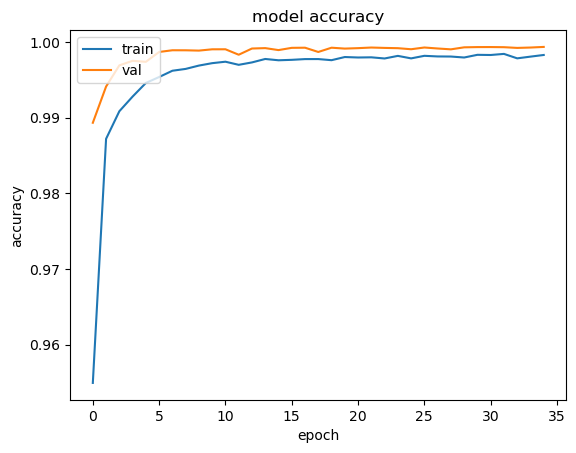

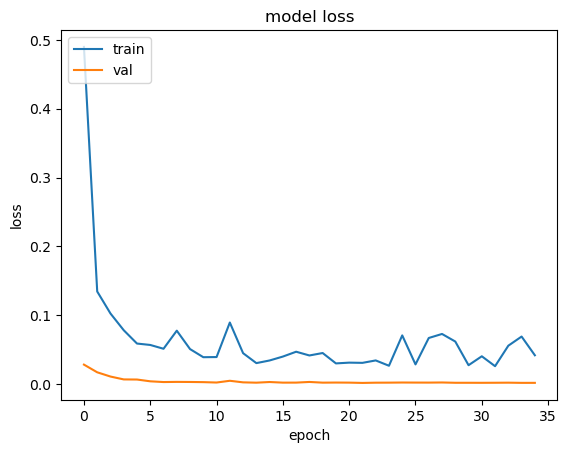

In [35]:
# Accurary
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Đánh giá mô hình

In [36]:
print("Đánh giá mô hình trên toàn bộ tập test:")
loss, acc = model1.evaluate(x_test, y_test)

Đánh giá mô hình trên toàn bộ tập test:
6935/6935 [==============================] - 5s 676us/step - loss: 0.0227 - accuracy: 0.9992


Dự đoán kiểu tấn công

In [37]:
import random as rd
number_test = rd.randint(0, x_test.shape[0])
x_new = x_test[number_test]
y_new = y_test.iloc[number_test]
x_new = np.expand_dims(x_new, axis=0)
y_predict = model1.predict(x_new)
attack_labels_digital = np.argmax(y_predict)
print("Giá trị dự đoán: ", attack_labels_digital)
print("Giá trị thực tế: ", y_new)
print("Kiểu tấn công: ", attack_labels[attack_labels_digital])

1/1 [==============================] - 0s 179ms/step
Giá trị dự đoán:  7
Giá trị thực tế:  7
Kiểu tấn công:  Normal
